In [23]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the CSV file to inspect its contents
file_path = 'C:/Users/bodic/OneDrive/Desktop/2024/STATTHEORY/PlantGrowth.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(30)

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [3]:
groups = data['group'].unique()
groups

array(['ctrl', 'trt1', 'trt2'], dtype=object)

## CHECKING ASSUMPTIONS

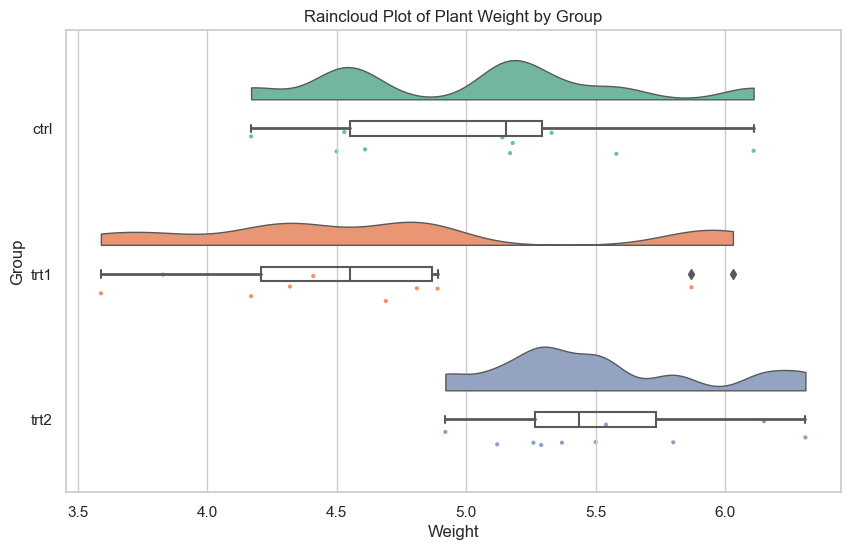

{'Assumption 4: Outliers': False,
 'Assumption 5: Normality Test (Shapiro-Wilk)': {'ctrl': {'W': 0.9566814905276368,
   'p-value': 0.7474734451902585},
  'trt1': {'W': 0.9304106932921845, 'p-value': 0.45194395810927823},
  'trt2': {'W': 0.9410051970546394, 'p-value': 0.5642518926711526}},
 "Assumption 6: Homogeneity of Variances (Levene's Test)": {'W': 1.1191856948703909,
  'p-value': 0.3412266241254737}}

In [17]:
assumption_checks = {}

# Assumption #4: Check for outliers in each group using z-scores
data['z_score'] = data.groupby('group')['weight'].transform(lambda x: (x - x.mean()) / x.std())
outliers = data[abs(data['z_score']) > 3]
assumption_checks["Assumption 4: Outliers"] = not outliers.empty

# Assumption #5: Test normality of 'weight' within each group using Shapiro-Wilk test
shapiro_results = {group: stats.shapiro(data[data['group'] == group]['weight']) for group in data['group'].unique()}
assumption_checks["Assumption 5: Normality Test (Shapiro-Wilk)"] = {
    group: {"W": result.statistic, "p-value": result.pvalue} for group, result in shapiro_results.items()
}

# Assumption #6: Test homogeneity of variances using Levene's test
ctrl_group = data[data['group'] == 'ctrl']['weight']
trt1_group = data[data['group'] == 'trt1']['weight']
trt2_group = data[data['group'] == 'trt2']['weight']
levene_result = stats.levene(ctrl_group, trt1_group, trt2_group)

assumption_checks["Assumption 6: Homogeneity of Variances (Levene's Test)"] = {
    "W": levene_result.statistic,
    "p-value": levene_result.pvalue
}

assumption_checks


sns.set(style="whitegrid")

# Create the raincloud plot
plt.figure(figsize=(10, 6))
ax = pt.RainCloud(x='group', y='weight', data=data, palette="Set2", orient="h", width_viol=0.6, width_box=0.1, move=0.1)

# Set plot labels and title
plt.title("Raincloud Plot of Plant Weight by Group")
plt.xlabel("Weight")
plt.ylabel("Group")

# Show the plot
plt.show()
assumption_checks


In [13]:
# Perform one-way ANOVA
# Split the data into groups based on the 'group' column
ctrl_group = data[data['group'] == 'ctrl']['weight']
trt1_group = data[data['group'] == 'trt1']['weight']
trt2_group = data[data['group'] == 'trt2']['weight']

#one-way ANOVA
anova_result = stats.f_oneway(ctrl_group, trt1_group, trt2_group)

anova_result


F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

In [15]:
zscore=abs(data['z_score'])
zscore

0     1.478327
1     0.939818
2     0.253820
3     1.848767
4     0.912378
5     0.723729
6     0.236670
7     0.860929
8     0.511069
9     0.185220
10    0.187734
11    0.618641
12    0.316250
13    1.349418
14    1.523292
15    1.047027
16    1.724886
17    0.288531
18    0.429647
19    0.036539
20    1.771458
21    0.917362
22    0.031633
23    0.058747
24    0.352484
25    0.533245
26    1.369265
27    1.409936
28    0.619107
29    0.601030
Name: z_score, dtype: float64

In [29]:
# Convert Tukey's HSD summary table to a DataFrame manually for better display
# Extract rows from the Tukey summary table and convert them to a DataFrame
tukey_result = pairwise_tukeyhsd(endog=data['weight'], groups=data['group'], alpha=0.05)

# Get rows and headers
tukey_data = tukey_result.summary().data[1:]  # Skip header row
tukey_columns = tukey_result.summary().data[0]  # Use header row as columns

# Create DataFrame for the Tukey test results
tukey_df = pd.DataFrame(data=tukey_data, columns=tukey_columns)

# Display the DataFrame with relevant statistics
tukey_df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,ctrl,trt1,-0.371,0.3909,-1.0622,0.3202,False
1,ctrl,trt2,0.494,0.1980,-0.1972,1.1852,False
2,trt1,trt2,0.865,0.0120,0.1738,1.5562,True
